In [1]:
# In this project we will discuss the analysis of a csv file as well as visualizing the data in the form of graphs applying 
# conditionings criteria
# we will work with dataframes
# importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# loading the movies dataset using pandas library

movies = pd.read_csv('project.csv')

# printing details and informations about dataset

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
Movie_title          100 non-null object
Market               100 non-null object
Production_studio    100 non-null object
Movie_type           100 non-null object
Production_year      100 non-null int64
Main_language        100 non-null object
Movie_genre          100 non-null object
Movie_runtime        100 non-null int64
Movie director       100 non-null object
Movie_main_role      100 non-null object
IMDB rating          100 non-null float64
Movie_budget         100 non-null int64
dtypes: float64(1), int64(3), object(8)
memory usage: 9.5+ KB


In [3]:
# printing some basic details about dataset (count, ,mean, std, etc)

movies.describe()

,Production_year,Movie_runtime,IMDB rating,Movie_budget
count,100.00000,100.000000,100.000000,1.000000e+02
mean,1993.09000,123.000000,7.506000,4.545906e+07
std,24.18201,36.327078,0.951535,7.398367e+07
min,1915.00000,22.000000,5.300000,5.000000e+02
25%,1986.50000,97.750000,6.775000,1.000000e+06
50%,1999.00000,120.000000,7.500000,9.750000e+06
75%,2010.00000,138.000000,8.200000,5.125000e+07
max,2019.00000,222.000000,9.800000,3.560000e+08


In [27]:
# Print first 5 rows of the file

movies.head(5)

,Movie_title,Market,Production_studio,Movie_type,Production_year,Main_language,Movie_genre,Movie_runtime,Movie director,Movie_main_role,IMDB rating,Movie_budget
0,Sons Of Dessert,United States of America,Hal Roach Studios,Comercial,1933,English,Comedy,68,William A. Seiter,Stan Laurel/Oliver Hardy,7.7,25000
1,Gone With The Wind,United States of America,Warner Bros.,Comercial,1939,English,Drama,222,Victor Fleming,Clark Gable,8.2,3977000
2,"Crounching Tiger, Hidden Dragon",Taiwan,Columbia Pictures,Comercial,2000,Mandarin,Action,120,Yun-Fat Chow,Ang Lee,7.9,17000000
3,Internal Affairs,Hong Kong,Media Asia Films,Comercial,2002,Thai,Crime,97,Andy Lau,Andy Lau,8.1,6428000
4,Red Cliff,China,Beijing Film Studio,Comercial,2008,Mandarin,Action,150,John Woo,Tony Chiu-Way Leung,7.4,80239000


In [10]:
# print last 5 rows of the file

movies.tail(5)

,Movie_title,Market,Production_studio,Movie_type,Production_year,Main_language,Movie_genre,Movie_runtime,Movie director,Movie_main_role,IMDB rating,Movie_budget
95,Casablanca,United States of America,Warner Bros.,Art,1942,English,Romance,102,Michael Curtiz,Humphrey Bogart,8.5,950000
96,The Lego Movie 2: The Second Part,United States of America,Warner Bros.,Comercial,2019,English,Animation,107,Mike Mitchell,Chriss Pratt,6.8,100000000
97,Aladdin,United States of America,Walt Disney Pictures,Comercial,2019,English,Adventure,128,Guy Ritchie,Will Smith,7.4,183000000
98,A Star Is Born,United States of America,Warner Bros.,Art,2018,English,Drama,138,Bradley Cooper,Lady Gaga,7.8,36000000
99,Wild Oats,United States of America,Wild Pictures,Art,2016,English,Action,86,Andy Tennant,Shirley McLaine,5.7,10000000


In [5]:
# printing dataframe of the movies with lowest and highest estimated budget
# we will build a function which will find the minimum and the maximum of a 

def find_minmax(x):
    #use the function 'idmin' to find the index of lowest profit movie.
    min_index = movies[x].idxmin()
    #use the function 'idmax' to find the index of Highest profit movie.
    high_index = movies[x].idxmax()
    high = pd.DataFrame(movies.loc[high_index,:])
    low = pd.DataFrame(movies.loc[min_index,:])
    
    #print the movie with high and low profit
    print("Movie wich Has highest budget is : ",movies['Movie_title'][high_index])
    print("Movie which Has lowest budget is  : ",movies['Movie_title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('Movie_budget')
            

Movie wich Has highest budget is :  Avengers Endgame
Movie which Has lowest budget is  :  Owned & Operated


,21,32
Movie_title,Avengers Endgame,Owned & Operated
Market,United States of America,United States of America
Production_studio,Marvel Studios,Crackin Films
Movie_type,Art,Comercial
Production_year,2019,2012
Main_language,English,English
Movie_genre,Action,Documentary
Movie_runtime,181,106
Movie director,Anthony Russo,Relic
Movie_main_role,Robert Downey Jr.,Jiddu Kishnamurti


In [12]:
# printing the frequency distribution of movies

data = movies.groupby('Production_year').count()['Movie_title']
print(data.head(10))
print(data.tail(10))


Production_year
1915    1
1920    1
1933    2
1937    1
1939    1
1942    1
1944    1
1948    1
1950    1
1955    1
Name: Movie_title, dtype: int64
Production_year
2009    3
2010    3
2011    3
2012    5
2013    2
2015    2
2016    1
2017    1
2018    2
2019    8
Name: Movie_title, dtype: int64


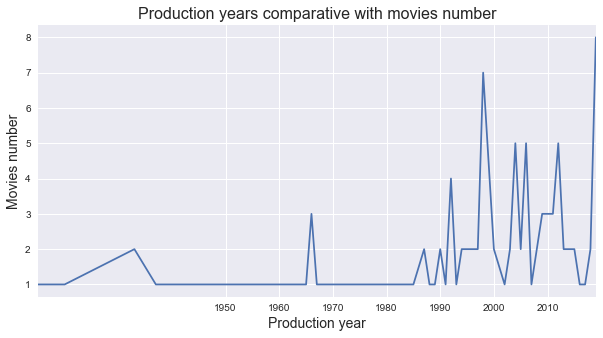

In [13]:
# displaying of graph which analyse the comparision between frequency distribution and production year

data.plot(xticks = np.arange(1950,2015,10))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Production years comparative with movies number",fontsize = 16)
plt.xlabel('Production year',fontsize = 14)
plt.ylabel('Movies number',fontsize = 14)
plt.show()
sns.set_style("darkgrid")

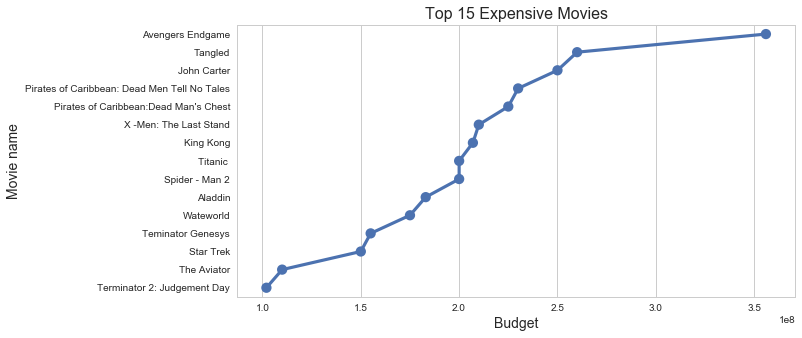

In [17]:
# displaying of a graph which represent the most 15 expensive movies existing in dataset

budget = pd.DataFrame(movies['Movie_budget'].sort_values(ascending = False))
budget['Movie_title'] = movies['Movie_title']
data1 = list(map(str,(budget['Movie_title'])))
x = list(data1[:15])
y = list(budget['Movie_budget'][:15])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 15 Expensive Movies",fontsize = 16)
ax.set_xlabel("Budget",fontsize = 14)
ax.set_ylabel("Movie name",fontsize = 14)
sns.set_style("whitegrid")
plt.show()

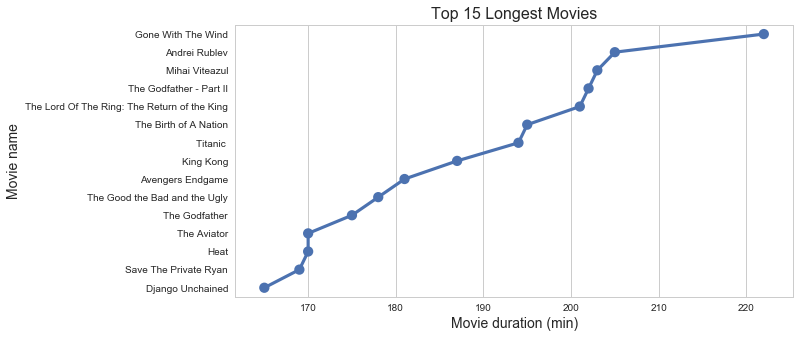

In [18]:
# displaying of a graph which represent the most 15 longest movies (minutes) existing in dataset

duration = pd.DataFrame(movies['Movie_runtime'].sort_values(ascending = False))
duration['Movie_title'] = movies['Movie_title']
data1 = list(map(str,(duration['Movie_title'])))
x = list(data1[:15])
y = list(duration['Movie_runtime'][:15])
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 15 Longest Movies",fontsize = 16)
ax.set_xlabel("Movie duration (min)",fontsize = 14)
ax.set_ylabel("Movie name",fontsize = 14)
sns.set_style("whitegrid")
plt.show()

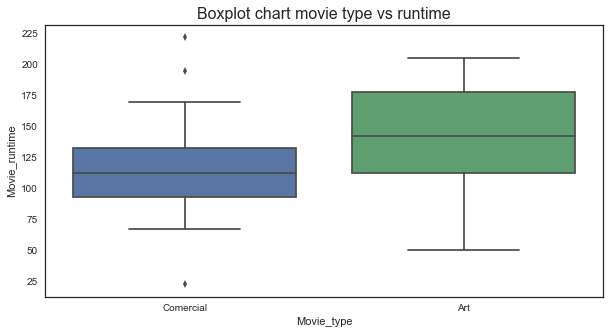

In [27]:
# displaying a boxplot chart representing the type of movie in comparision with duration of movies
plot1 = sns.boxplot(data=movies, x = 'Movie_type', y = 'Movie_runtime')
plt.title('Boxplot chart movie type vs runtime', fontsize = 16)
sns.set_style('white')
plt.show()

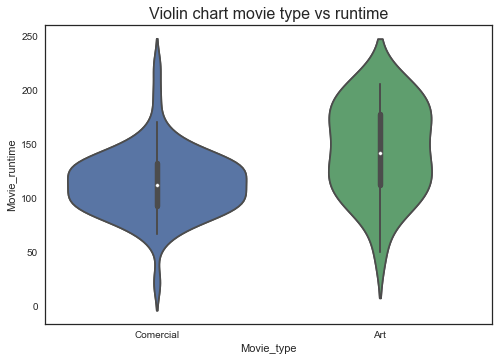

In [24]:
# displaying a violinplot chart representing the type of movie in comparision with duration of movies
plot2 = sns.violinplot(data=movies, x = 'Movie_type', y = 'Movie_runtime')
plt.title('Violin chart movie type vs runtime', fontsize = 16)
sns.set_style('darkgrid')
plt.show()

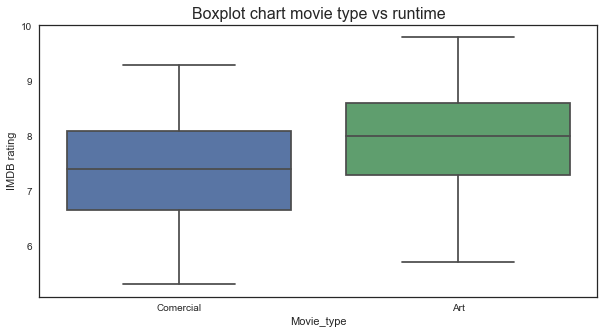

In [28]:
# # displaying a boxplot chart representing the type of movie in comparision with IMDB rating of movie
plot3 = sns.boxplot(data=movies, x = 'Movie_type', y = 'IMDB rating')
plt.title('Boxplot chart movie type vs runtime', fontsize = 16)
sns.set_style('white')
plt.show()

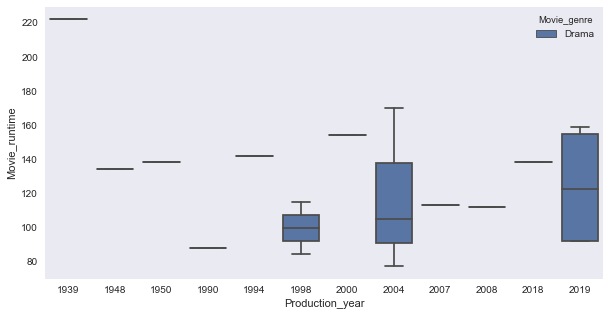

In [34]:
# displaying of a boxplot chart representing the comparision between production years and duration of movies only for 
# Drama genre
plot4 = sns.boxplot(data=movies[movies.Movie_genre == 'Drama'], x ='Production_year', y ='Movie_runtime', hue = 'Movie_genre')
sns.set_style('darkgrid')
plt.show()

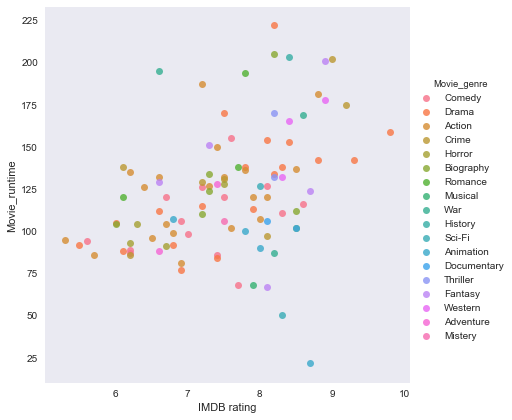

In [31]:
# displaying a scatter plot representing IMDB rating of movies vs duration of movies 
# it was used as color mapping the genres of movies
fig1 = sns.lmplot(data=movies, x='IMDB rating', y='Movie_runtime', fit_reg=False, hue='Movie_genre', size=6, aspect=1)
sns.set_style('white')
plt.show()

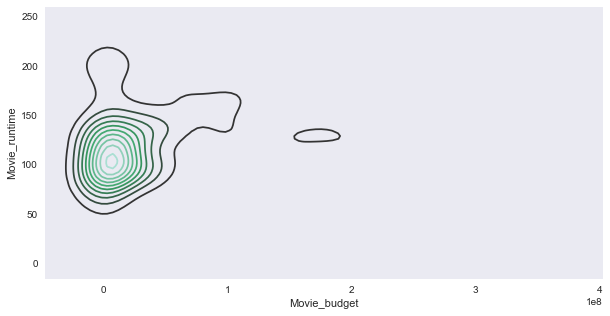

In [31]:
# displaying of a KDE plot chart representing budget of movies in comparision with duration of movies

sns.set_style('dark')
fig2 = sns.kdeplot(movies.Movie_budget, movies.Movie_runtime)
plt.show()

In [30]:
# the column IMDB rating was renamed with Movie_rating
# the new dataframe looks like below

movies.rename(columns = {'IMDB rating' : 'Movie_rating'}, inplace = True)
movies

,Movie_title,Market,Production_studio,Movie_type,Production_year,Main_language,Movie_genre,Movie_runtime,Movie director,Movie_main_role,Movie_rating,Movie_budget
0,Sons Of Dessert,United States of America,Hal Roach Studios,Comercial,1933,English,Comedy,68,William A. Seiter,Stan Laurel/Oliver Hardy,7.7,25000
1,Gone With The Wind,United States of America,Warner Bros.,Comercial,1939,English,Drama,222,Victor Fleming,Clark Gable,8.2,3977000
2,"Crounching Tiger, Hidden Dragon",Taiwan,Columbia Pictures,Comercial,2000,Mandarin,Action,120,Yun-Fat Chow,Ang Lee,7.9,17000000
3,Internal Affairs,Hong Kong,Media Asia Films,Comercial,2002,Thai,Crime,97,Andy Lau,Andy Lau,8.1,6428000
4,Red Cliff,China,Beijing Film Studio,Comercial,2008,Mandarin,Action,150,John Woo,Tony Chiu-Way Leung,7.4,80239000
5,Wolf Creek,Australia,The South Australian Film Co.,Comercial,2005,English,Horror,104,Greg McLean,Nathan Phillips,6.3,1000000
6,Andrei Rublev,Russia,Mosfilm,Art,1966,Russian,Biography,205,Andrei Tarkovsky,Anatoliy Solonitsyn,8.2,15000
7,Titanic,United States of America,20th Century Fox,Art,1997,English,Romance,194,James Cameron,Leonardo DiCaprio,7.8,200000000
8,Duck Soup,United States of America,Paramount Pictures,Comercial,1933,English,Musical,68,Leo McCarey,Marx Brothers,7.9,25000
9,Going My Way,United States of America,Paramount Pictures,Comercial,1944,English,Comedy,126,Leo McCarey,Bing Crosby,7.2,1500000


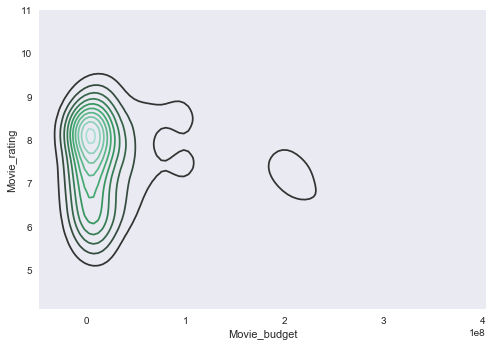

In [77]:
# displaying of a KDE plot chart representing budget of movies in comparision with rating of movies
sns.set_style('dark')
fig3 = sns.kdeplot(movies.Movie_budget, movies.Movie_rating)
plt.show()

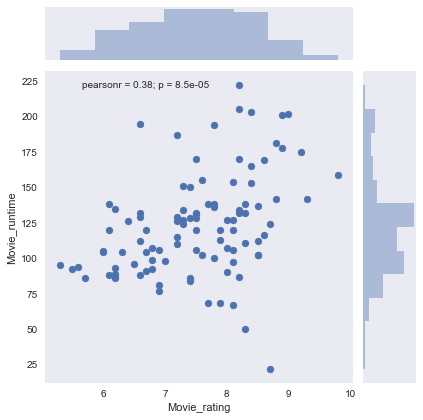

In [83]:
# displaying of a jointplot chart representing rating of movies in comparision with duration of movies
fig4 = sns.jointplot(data=movies, x='Movie_rating', y='Movie_runtime')
plt.show()

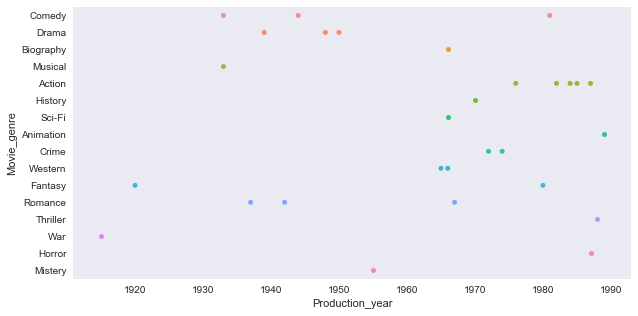

In [33]:
# dispalying a swarplot chart representing the comparision between release year of movies and genres of movies only for movies
# produced before 1990

fig5 = sns.swarmplot(x='Production_year', y='Movie_genre', data=movies[movies['Production_year'] < 1990])
sns.set_style('dark')
plt.show()

